# Import Libraries

In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.7/104.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 42.0 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.8/103.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=138965 sha256=ec029eb3c20dd811f28fc96a1e5683aea0efe87bae9b97489fb3c8d8b6f761f8
  Stored in directory: /root/.cache/pip/wheels/2d/8f/b5/28f0f41351420da5423424fc74e55219347e0bb0cbca09bb82
Successfully built peewee
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
  Att

In [2]:
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

# data preperation

In [4]:
# data = pd.read_csv('../input/cryptocurrencies-dataset/crypto_data_updated_13_november.csv')

In [5]:
btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [6]:
p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')

In [7]:
data.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2019-12-25 00:00:00+00:00,7275.155762,21559505149,126.454636,8418019054,1.004661,24502862889,13.174839,152718120
2019-12-26 00:00:00+00:00,7238.966797,22787010034,126.361221,8600871980,1.003988,27081119738,13.208636,157660620
2019-12-27 00:00:00+00:00,7290.088379,22777360996,127.214607,8299390176,1.005803,26617288047,13.362720,164413385
2019-12-28 00:00:00+00:00,7317.990234,21365673026,128.322708,8069298610,1.000307,25847515455,13.705417,197525901
2019-12-29 00:00:00+00:00,7422.652832,22445257702,134.757980,9708776786,1.004210,26657374932,14.150045,225354585


In [8]:
data.tail()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2024-12-20 00:00:00+00:00,97755.929688,105634083408,3472.553467,66383827229,0.999526,259587932676,678.086609,3064285256
2024-12-21 00:00:00+00:00,97224.726562,51765334294,3337.222412,31579389836,0.999770,145138019727,663.279480,2185739949
2024-12-22 00:00:00+00:00,95104.937500,43147981314,3277.535156,24780768375,0.999073,113706935887,648.704712,1091595586
2024-12-23 00:00:00+00:00,94686.242188,65239002919,3415.785400,34496081389,0.998721,143549331087,693.000732,1738271695
2024-12-25 00:00:00+00:00,98150.085938,44550991872,3484.860840,22028769280,0.999188,108927893504,703.310181,1079514752


In [9]:
# data = data.drop(columns = ['Unnamed: 0'])

In [10]:
# data.head()

In [11]:
# data.to_csv('crypto prices.csv')

In [12]:
data.shape

(1827, 8)

In [13]:
original = data.iloc[-1, :]
data = data.iloc[:-1,:]

In [14]:
data

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2019-12-25 00:00:00+00:00,7275.155762,21559505149,126.454636,8418019054,1.004661,24502862889,13.174839,152718120
2019-12-26 00:00:00+00:00,7238.966797,22787010034,126.361221,8600871980,1.003988,27081119738,13.208636,157660620
2019-12-27 00:00:00+00:00,7290.088379,22777360996,127.214607,8299390176,1.005803,26617288047,13.362720,164413385
2019-12-28 00:00:00+00:00,7317.990234,21365673026,128.322708,8069298610,1.000307,25847515455,13.705417,197525901
2019-12-29 00:00:00+00:00,7422.652832,22445257702,134.757980,9708776786,1.004210,26657374932,14.150045,225354585
...,...,...,...,...,...,...,...,...
2024-12-19 00:00:00+00:00,97490.953125,97221662392,3417.927979,58879190250,0.999200,235961162359,666.569336,2806454484
2024-12-20 00:00:00+00:00,97755.929688,105634083408,3472.553467,66383827229,0.999526,259587932676,678.086609,3064285256
2024-12-21 00:00:00+00:00,97224.726562,51765334294,3337.222412,31579389836,0.999770,145138019727,663.279480,2185739949


# Exploratory Data Analysis

### Statistical Analysis

In [15]:
#check the shape of the dataframe
data.shape 

(1826, 8)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2019-12-25 00:00:00+00:00 to 2024-12-23 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1826 non-null   float64
 1   Volume (BTC)   1826 non-null   int64  
 2   Close (ETH)    1826 non-null   float64
 3   Volume (ETH)   1826 non-null   int64  
 4   Close (USDT)   1826 non-null   float64
 5   Volume (USDT)  1826 non-null   int64  
 6   Close (BNB)    1826 non-null   float64
 7   Volume (BNB)   1826 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.4 KB


In [17]:
data.isna().sum()

Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [18]:
data.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1826.000000,1.826000e+03,1826.000000,1.826000e+03,1826.000000,1.826000e+03,1826.000000,1.826000e+03
mean,35947.507541,3.309892e+10,1969.089734,1.665026e+10,1.000425,5.887985e+10,303.903250,1.419606e+09
std,20834.876707,1.951200e+10,1149.604824,1.054391e+10,0.002132,3.809126e+10,195.344030,1.398795e+09
min,4970.788086,5.331173e+09,110.605873,2.081626e+09,0.974248,9.989859e+09,9.386050,1.365992e+08
25%,19445.655273,2.060398e+10,1234.281250,9.409824e+09,0.999943,3.485866e+10,213.766796,4.556970e+08
50%,31753.560547,2.983913e+10,1865.225952,1.455361e+10,1.000201,5.024082e+10,300.824188,1.066960e+09
75%,50044.494141,4.007090e+10,2874.363342,2.046344e+10,1.000594,7.023821e+10,436.915710,1.889670e+09
max,106140.601562,3.509679e+11,4812.087402,8.448291e+10,1.053585,3.006686e+11,750.272644,1.798295e+10


### Visualization Analysis

<AxesSubplot:xlabel='Date'>

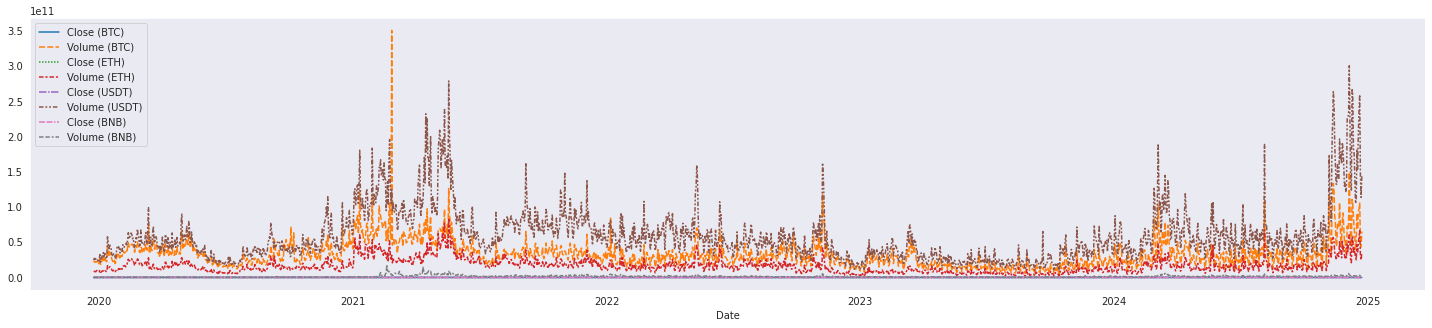

In [19]:
plt.figure(figsize = (25, 5))
sns.set_style('dark')
sns.lineplot(data=data)

Text(0.5, 1.0, 'Adjacent Close Price')

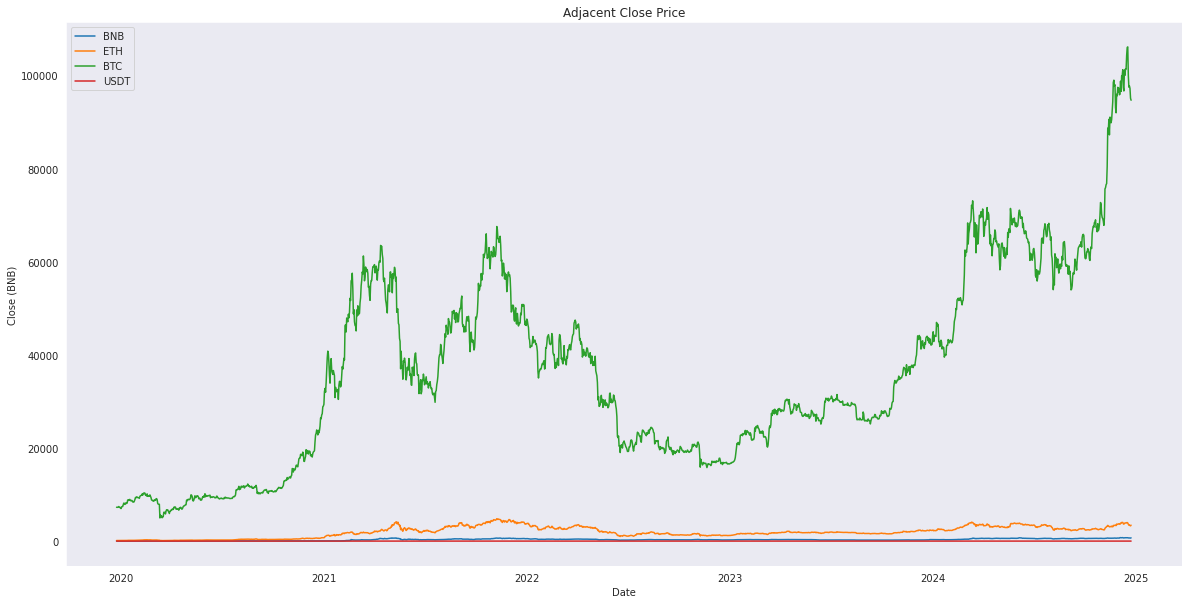

In [20]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data['Close (BNB)'], label = 'BNB')
sns.lineplot(data = data['Close (ETH)'], label = 'ETH')
sns.lineplot(data = data['Close (BTC)'], label = 'BTC')
sns.lineplot(data = data['Close (USDT)'], label = 'USDT')
plt.title('Adjacent Close Price')

Text(0.5, 1.0, 'Volume')

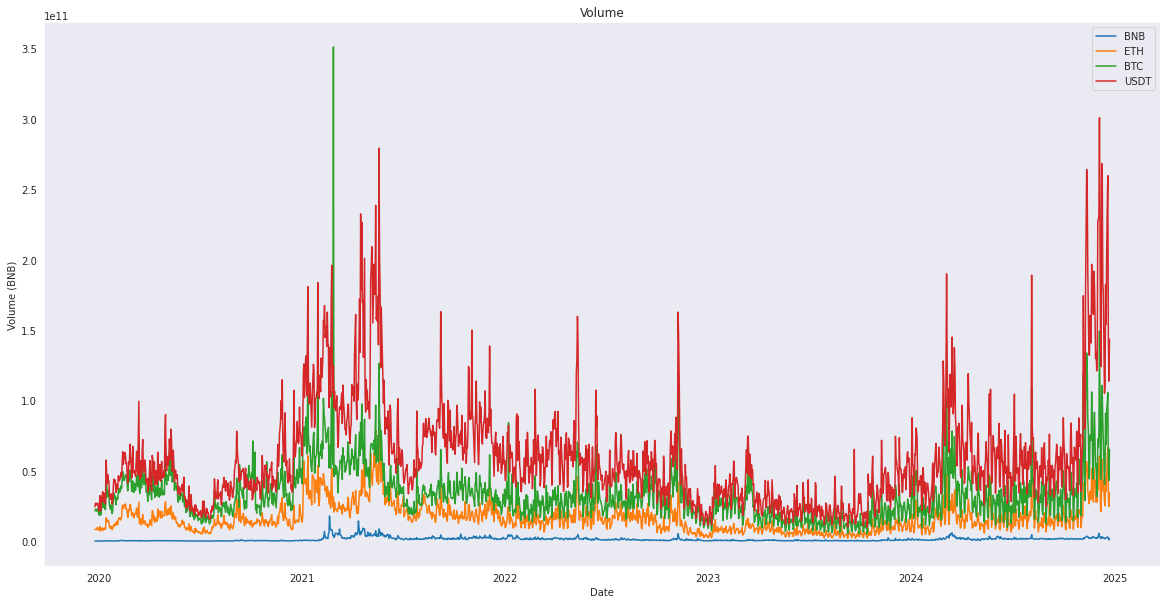

In [21]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data['Volume (BNB)'], label = 'BNB')
sns.lineplot(data = data['Volume (ETH)'], label = 'ETH')
sns.lineplot(data = data['Volume (BTC)'], label = 'BTC')
sns.lineplot(data = data['Volume (USDT)'], label = 'USDT')
plt.title('Volume')

In [22]:
data_btc = data.loc[:,'Close (BTC)'].values
data_btc

array([ 7275.15576172,  7238.96679688,  7290.08837891, ...,
       97224.7265625 , 95104.9375    , 94686.2421875 ])

In [23]:
import plotly.graph_objects as go
from datetime import datetime

temp = yf.Ticker('BTC-USD')
data_btc = btc.history(period='5y')

fig = go.Figure(data=[go.Candlestick(x=data_btc.index,
                open=data_btc['Open'],
                high=data_btc['High'],
                low=data_btc['Low'],
                close=data_btc['Close'])])

fig.show()

array([[<AxesSubplot:title={'center':'Close (BTC)'}>,
        <AxesSubplot:title={'center':'Volume (BTC)'}>,
        <AxesSubplot:title={'center':'Close (ETH)'}>,
        <AxesSubplot:title={'center':'Volume (ETH)'}>],
       [<AxesSubplot:title={'center':'Close (USDT)'}>,
        <AxesSubplot:title={'center':'Volume (USDT)'}>,
        <AxesSubplot:title={'center':'Close (BNB)'}>,
        <AxesSubplot:title={'center':'Volume (BNB)'}>]], dtype=object)

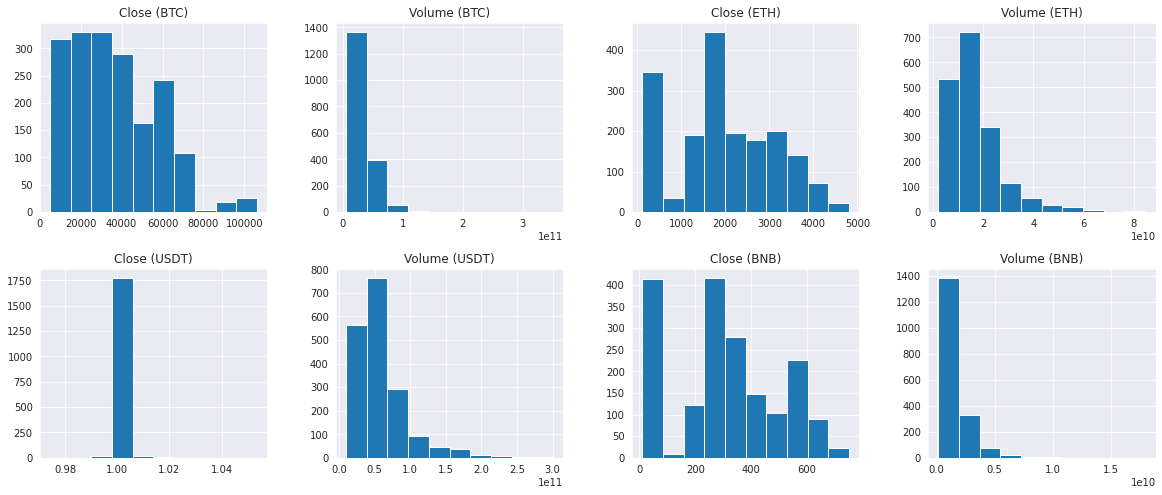

In [24]:
data.hist(figsize=(20, 8), layout=(2, 4))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

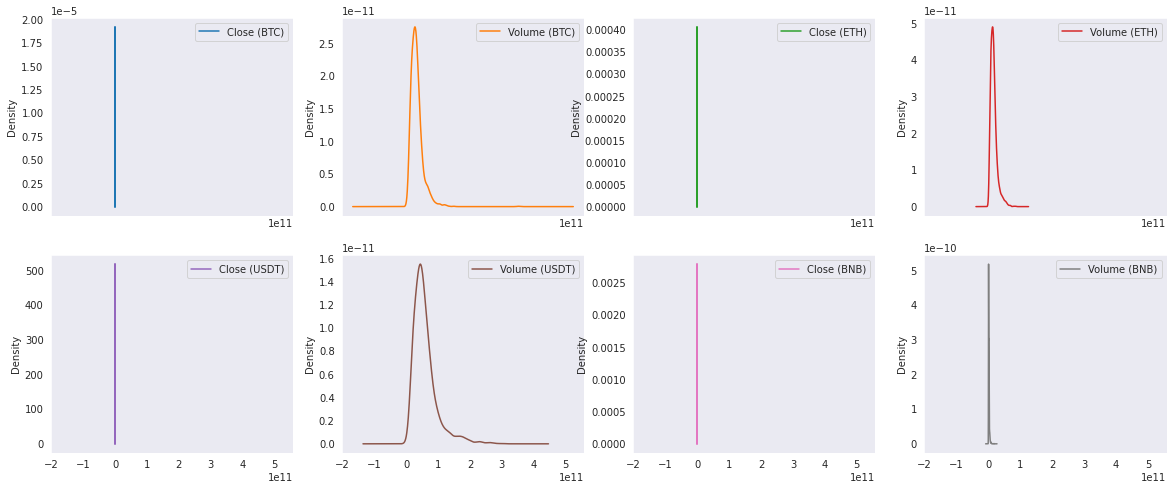

In [25]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

### checking for correlation

In [26]:
data.corr()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Close (BTC),1.000000,0.297767,0.860475,0.393315,-0.121966,0.548056,0.877566,0.555239
Volume (BTC),0.297767,1.000000,0.103430,0.826551,0.057851,0.844377,0.105950,0.508271
Close (ETH),0.860475,0.103430,1.000000,0.271985,-0.149905,0.393259,0.919391,0.513140
Volume (ETH),0.393315,0.826551,0.271985,1.000000,0.039442,0.919101,0.234709,0.616660
Close (USDT),-0.121966,0.057851,-0.149905,0.039442,1.000000,0.026376,-0.166385,-0.048659
Volume (USDT),0.548056,0.844377,0.393259,0.919101,0.026376,1.000000,0.370503,0.683408
Close (BNB),0.877566,0.105950,0.919391,0.234709,-0.166385,0.370503,1.000000,0.527507
Volume (BNB),0.555239,0.508271,0.513140,0.616660,-0.048659,0.683408,0.527507,1.000000


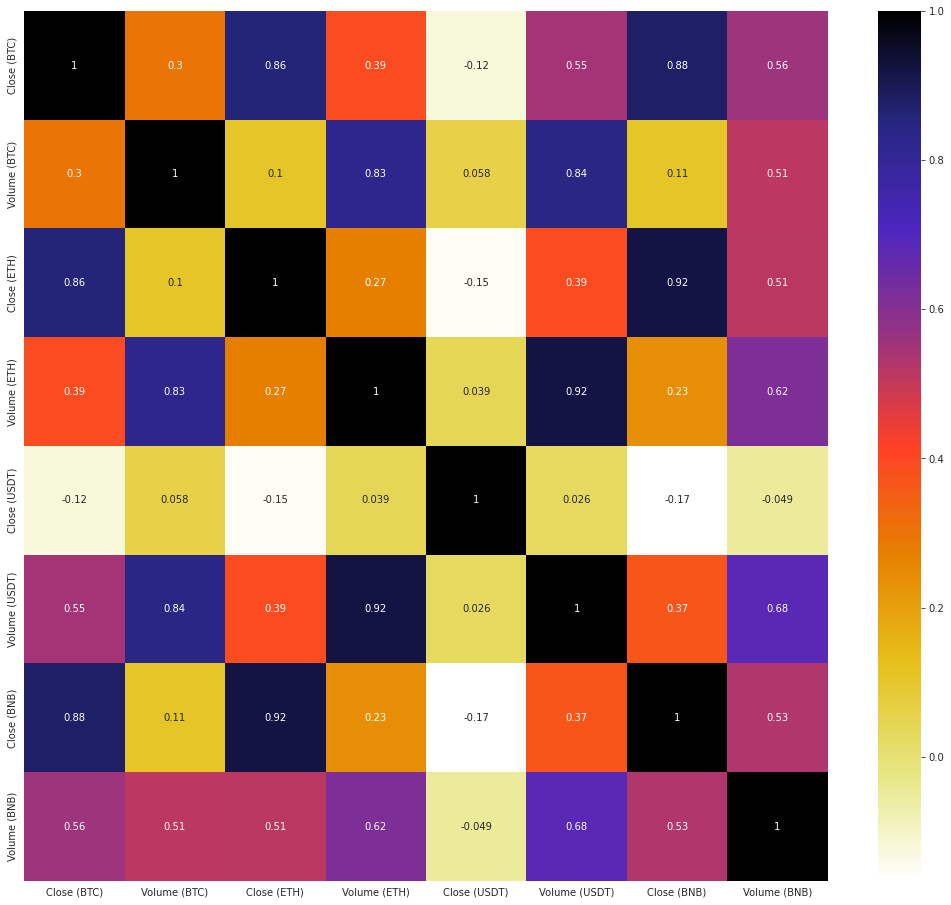

In [27]:
plt.figure(figsize=(18,16))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.CMRmap_r);

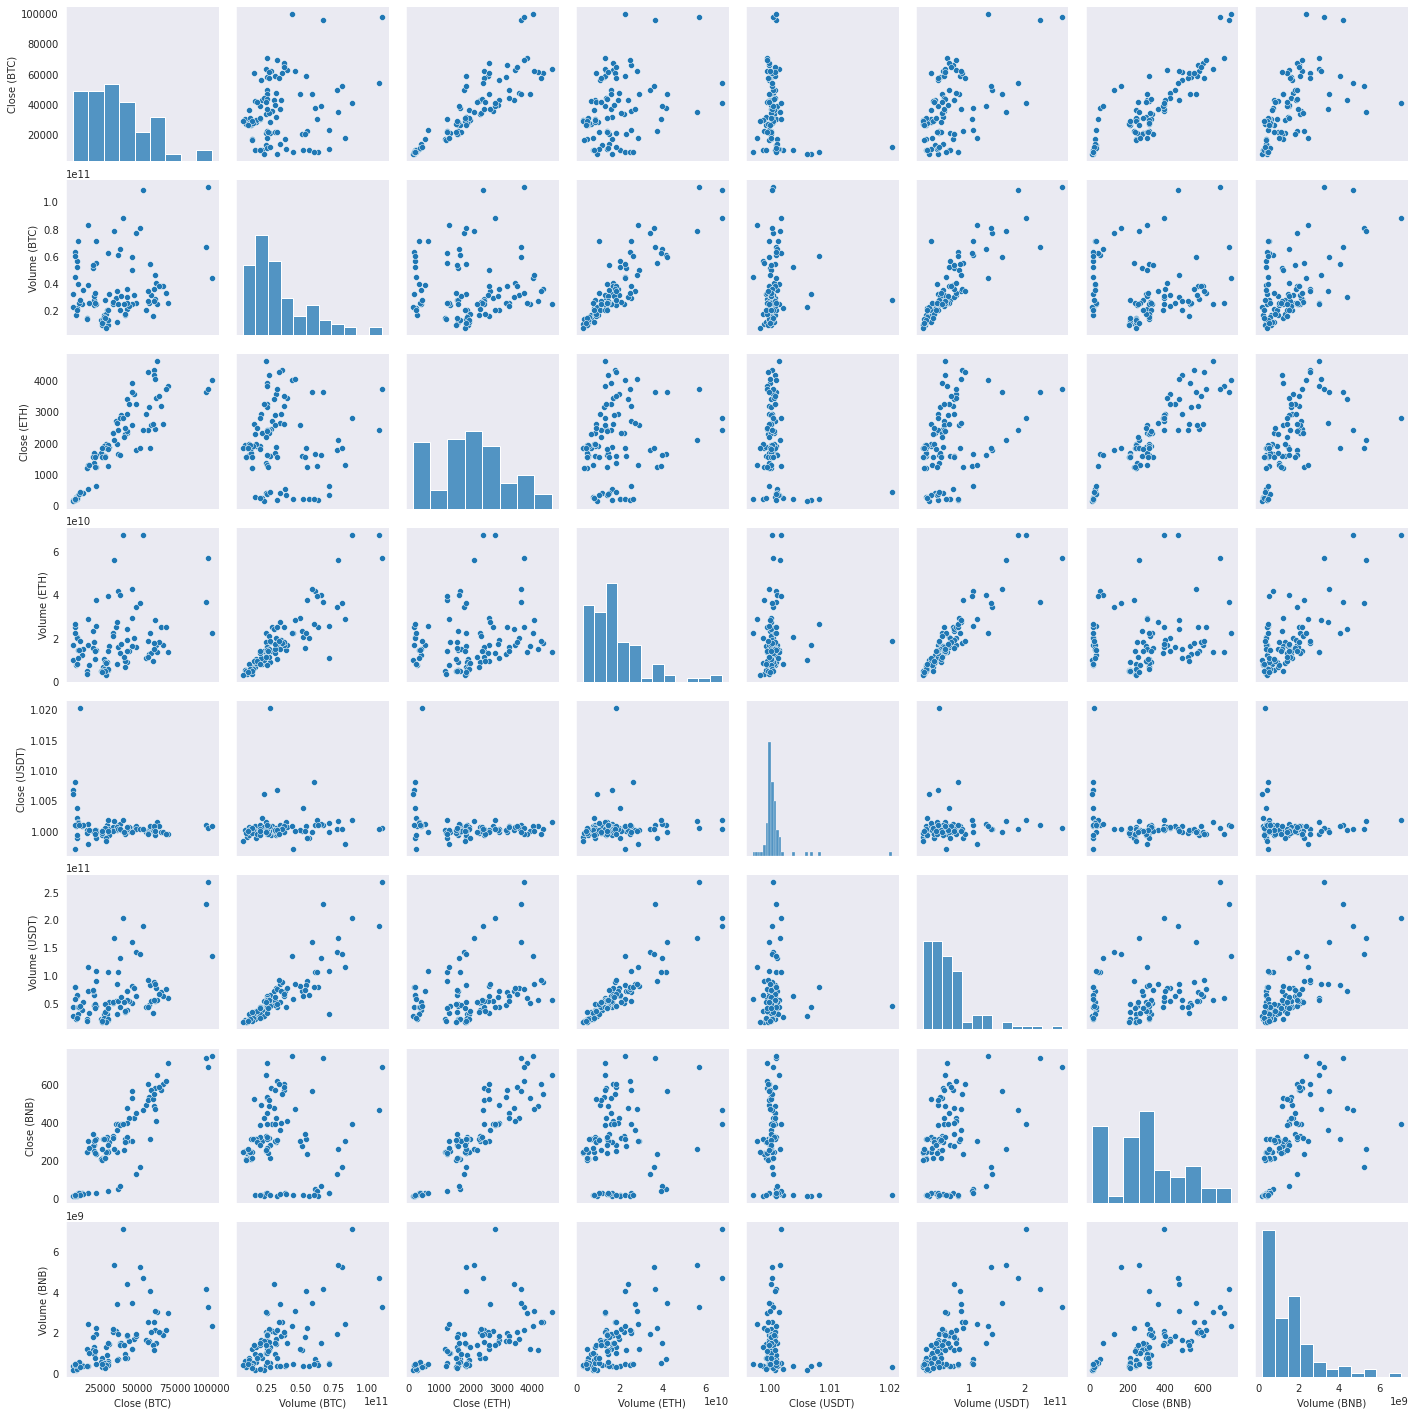

In [28]:
sns.pairplot(data.sample(n=100));

In [29]:
# import pandas_profiling
# pandas_profiling.ProfileReport(data)

# data Pre-processing

In [30]:
# X = data.loc[:, ['Adj Close (BNB)', 'Adj Close (USDT)', 'Adj Close (ETH)']]
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [31]:
X.head()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2019-12-25 00:00:00+00:00,21559505149,126.454636,8418019054,1.004661,24502862889,13.174839,152718120
2019-12-26 00:00:00+00:00,22787010034,126.361221,8600871980,1.003988,27081119738,13.208636,157660620
2019-12-27 00:00:00+00:00,22777360996,127.214607,8299390176,1.005803,26617288047,13.362720,164413385
2019-12-28 00:00:00+00:00,21365673026,128.322708,8069298610,1.000307,25847515455,13.705417,197525901
2019-12-29 00:00:00+00:00,22445257702,134.757980,9708776786,1.004210,26657374932,14.150045,225354585


In [32]:
Y.head()

Date
2019-12-25 00:00:00+00:00    7275.155762
2019-12-26 00:00:00+00:00    7238.966797
2019-12-27 00:00:00+00:00    7290.088379
2019-12-28 00:00:00+00:00    7317.990234
2019-12-29 00:00:00+00:00    7422.652832
Name: Close (BTC), dtype: float64

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [34]:
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Feature Selection

In [36]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# BaseLine Modeling




In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=2)

In [39]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [40]:
dt = tree.DecisionTreeRegressor()
dt.fit(X_train, Y_train)

DecisionTreeRegressor()

In [41]:
est = GradientBoostingRegressor()
est.fit(X_train, Y_train)

GradientBoostingRegressor()

# Evaluation

In [42]:
Y_pred_neigh = neigh.predict(X_test)
r2neigh = metrics.r2_score(Y_test, Y_pred_neigh)

Y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(Y_test, Y_pred_rf)

Y_pred_dt = dt.predict(X_test)
r2dt = metrics.r2_score(Y_test, Y_pred_dt)

Y_pred_est = est.predict(X_test)
r2est = metrics.r2_score(Y_test, Y_pred_est)

In [43]:
print("*"*10, "Accuracy", "*"*10)

print("-"*30)
print("K nearest neighbors: ", r2neigh)
print("-"*30)


print("-"*30)
print("random forest: ", r2rf)
print("-"*30)


print("-"*30)
print("decision tree: ", r2dt)
print("-"*30)


print("-"*30)
print("gradient boosting: ", r2est)
print("-"*30)

********** Accuracy **********
------------------------------
K nearest neighbors:  0.9006418325600795
------------------------------
------------------------------
random forest:  0.9219162142050773
------------------------------
------------------------------
decision tree:  0.8565814954303632
------------------------------
------------------------------
gradient boosting:  0.9084857603039762
------------------------------


result: random forest gives the highest accuracy.

In [44]:
# plt.figure(figsize = (20, 10))
# sns.set_style('darkgrid')
# sns.lineplot(x = X_test.index, y = Y_pred, label = "Predicted Price")
# sns.lineplot(x = X_test.index, y = Y_test, label = "Actual Price")
# plt.title('Actual vs Predicted values in test data')

In [45]:
# plt.figure(figsize = (20, 10))
# sns.set_style('darkgrid')
# sns.lineplot(x = X_train.index, y = rf.predict(X_train), label = "Predicted Price")
# sns.lineplot(x = X_train.index, y = Y_train, label = "Actual Price")
# plt.title('Actual vs Predicted values in training data')

# Hyperparameter Tuning

In [46]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 100)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 200, num = 20)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [47]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=0, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, 160, 170,
                                                      180, 190, 200, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 1

In [48]:
rf_random.best_params_

{'n_estimators': 120,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

# Model Evaluation (performance analysis)

In [49]:
rf = RandomForestRegressor(**rf_random.best_params_)
rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(Y_test, Y_pred_rf)

print("-"*30)
print("Accuracy: ", r2rf)
print("-"*30)

------------------------------
Accuracy:  0.9249642707985589
------------------------------


# Machine Learning Explainability

In [50]:
import shap

In [51]:
shap.initjs()

In [52]:
shap_values = shap.TreeExplainer(rf).shap_values(X_test)

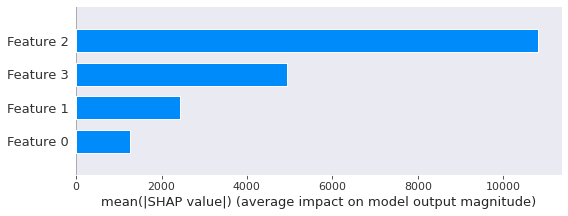

In [53]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

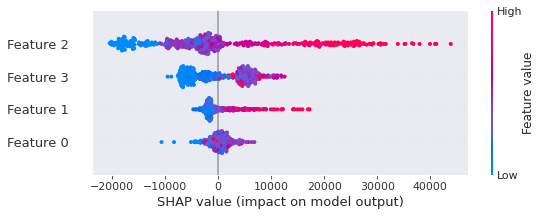

In [54]:
shap.summary_plot(shap_values, X_test)

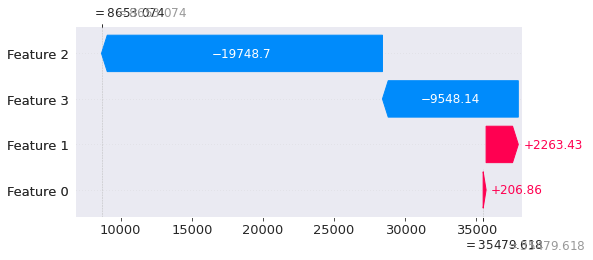

[0.13533677 0.23928544 0.00782246 0.01678593]


In [55]:
row = 111
shap.plots._waterfall.waterfall_legacy(shap.TreeExplainer(rf).expected_value[0], 
                                       shap_values[row],
                                      )

print(X_test[111])

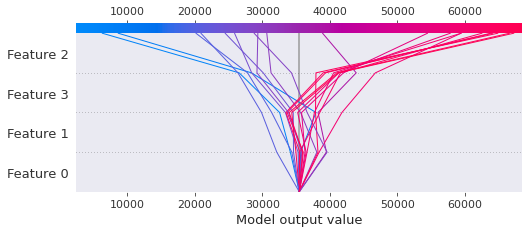

In [56]:
shap.decision_plot(shap.TreeExplainer(rf).expected_value[0], 
                   shap_values[110:130])

In [57]:
shap.force_plot(shap.TreeExplainer(rf).expected_value, shap_values[0:257], X_test[0:257])

# Prediction

In [58]:
original

Close (BTC)      9.815009e+04
Volume (BTC)     4.455099e+10
Close (ETH)      3.484861e+03
Volume (ETH)     2.202877e+10
Close (USDT)     9.991878e-01
Volume (USDT)    1.089279e+11
Close (BNB)      7.033102e+02
Volume (BNB)     1.079515e+09
Name: 2024-12-25 00:00:00+00:00, dtype: float64

---